In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout
import cv2


Using TensorFlow backend.


In [2]:
X_train = np.zeros((15*3, 24,24))
y_train = np.zeros(15*3)

for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/circle/circle{0:03d}.png'.format(i+1), 0)        
    X_train[i,:,:] = img
    y_train[i] = 0
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/rectangle/rectangle{0:03d}.png'.format(i+1), 0)        
    X_train[15+i,:,:] = img
    y_train[15+i] = 1
    
for i in range(15) :    
    img = cv2.imread('hard_handwriting_shape/train/triangle/triangle{0:03d}.png'.format(i+1), 0)        
    X_train[30+i,:,:] = img
    y_train[30+i] = 2     
    



In [3]:
X_test = np.zeros((5*3, 24,24))
y_test = np.zeros(5*3)

for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/circle/circle{0:03d}.png'.format(i+16), 0)        
    X_test[i,:,:] = img
    y_test[i] = 0
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/rectangle/rectangle{0:03d}.png'.format(i+16), 0)        
    X_test[5+i,:,:] = img
    y_test[5+i] = 1
    
for i in range(5) :    
    img = cv2.imread('hard_handwriting_shape/test/triangle/triangle{0:03d}.png'.format(i+16), 0)        
    X_test[10+i,:,:] = img
    y_test[10+i] = 2

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:933: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


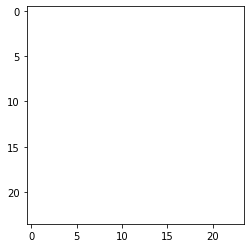

Label:  2.0


In [4]:
plt.imshow(X_test[14], cmap="gray")    # show first number in the dataset
plt.show()
print('Label: ', y_test[14])

In [5]:
#categorical 원핫 인코딩하는데 사용
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45, 24, 24) (15, 24, 24) (45, 3) (15, 3)


In [6]:
#cnn하려면 4차원으로 변형
# 4차원으로 변형, nX_train =  X_train.reshape(-1, 24,24,1)

#-1은 전체를 의미, :와 동일, 24*24
# 4차원으로 변경
X_train =  X_train.reshape(-1, 24, 24, 1)
X_test =  X_test.reshape(-1, 24, 24, 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45, 24, 24, 1)
(15, 24, 24, 1)
(45, 3)
(15, 3)


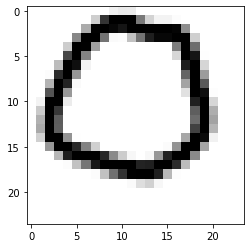

In [7]:
plt.imshow(X_train[2,:,:,0], cmap="gray")  
plt.show()

In [8]:
#모델 구성하기

model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #영상 사이즈를 반으로 줄임


model.add(Flatten())

model.add(Dense(128))                     #128개의 히든 노드를 생성     
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))



#모델 엮기
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [9]:
#이래야, 2차원 데이터가 나온다.
history = model.fit(X_train, y_train, batch_size = 15, epochs = 100, validation_data =(X_test, y_test), verbose = 0)

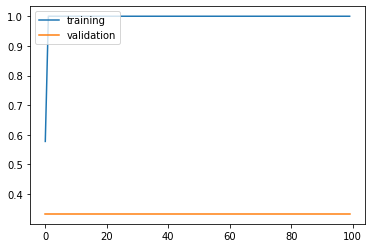

15/15 [==============================] - 0s 197us/step
[6.251943111419678, 0.3333333432674408]


In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()
results = model.evaluate(X_test, y_test)
print(results)

In [11]:
model.summary()
#3*3 짜리가 32개
#cnn에서는 전체 필터의 모양을 봐야한다. 하나하나가 의미가 없다.
#22*22가 나온것은 가장 외곽에 있는것을 무시해서 그렇다. 3*3을 적용할 수 없어 계산이 안된다.
#실계산요소 :
#prediction : 그냥 output을 내는것, 예측의 의미가 아니다.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
activation_2 (Activation)    (None, 9, 9, 64)         

In [12]:
#각각의 레이어의 이름
for l in model.layers:
    print(l.name)
    
w = model.layers[0].get_weights()

print(w)
print(w[0].shape) #필터들의 정보 : 3*3크기, 바이어스 1개, 필터 32개, 총 바이어스의 수 = 필터수 * 각 채널마다 존재하는 바이어스 수
print(w[1].shape) #필터의 바이어스 편향치 얘를 더해서 출력
print(w[0][:,:,0,0]) #2 인덱스에 있는것은 거짓차원


#나중에 보여줄때 복원에 필요하기때문에, 계산은 필요 없어도, 파라미터가 존재한다. batch 같은애들은 계산에 필요한 파라미터는 아니다.

conv2d_1
batch_normalization_1
activation_1
max_pooling2d_1
conv2d_2
batch_normalization_2
activation_2
max_pooling2d_2
flatten_1
dense_1
batch_normalization_3
activation_3
dense_2
batch_normalization_4
dense_3
[array([[[[-0.06505532, -0.05709056,  0.06089919, -0.04066324,
           0.02002005, -0.08332739,  0.01278744, -0.06862089,
          -0.06915525,  0.06972224,  0.00248428,  0.07756526,
           0.13317034,  0.132599  , -0.11052707,  0.10066359,
           0.03118583, -0.10396164,  0.14493808,  0.09531815,
           0.10620107,  0.04741548,  0.00837123, -0.00206415,
           0.06196466,  0.06584848, -0.0280572 ,  0.04431516,
          -0.12688695,  0.11773142, -0.03310693,  0.13773666]],

        [[ 0.118054  ,  0.09934337, -0.03030242,  0.02574492,
          -0.1250964 , -0.0780546 , -0.0254576 , -0.12818925,
           0.07946027,  0.08306459,  0.07225259, -0.05158544,
           0.07663378,  0.05220746,  0.03941649, -0.13349082,
          -0.08760996,  0.06050465, -0.02

In [13]:
#위에 있는건 학습 안시키고, 아래에 있는것 가지고만 학습시킨다.
#특정계층만 안 시킬것이면, False로 두면된다.
model.layers[0].output
#tensor를 numpy와 똑같은 다차원 배열이라 생각하자
#tensorflow

#print(w[0][0]) #: 0번째 필터의 바이어스

<tf.Tensor 'conv2d_1/BiasAdd:0' shape=(?, 22, 22, 32) dtype=float32>

(15, 22, 22, 32)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:933: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


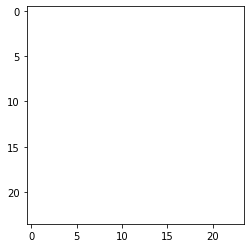

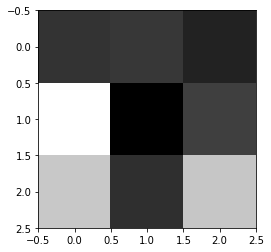

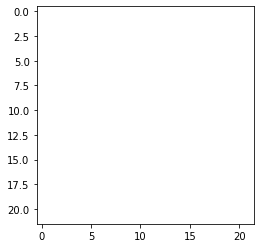

[[[-0.05689545 -0.03248469  0.10228588  0.08831152 -0.06464503
    0.14019215  0.08737359 -0.13245441  0.0238662  -0.13253428
   -0.04986314  0.12033606 -0.07301535  0.07039935  0.02479708
   -0.11875015 -0.01517857  0.06573706 -0.07414361 -0.04785274
   -0.13306718  0.00069844  0.09150949 -0.10617898 -0.11160559
   -0.04083835  0.03955793 -0.14522167  0.0855054  -0.04866123
    0.03930196  0.01318495]]

 [[-0.00058945 -0.05910932 -0.04051004 -0.10023544  0.1113338
   -0.13915552  0.05999988 -0.07762828 -0.10565013  0.09097751
   -0.06333651  0.10164768 -0.12842612 -0.08225998  0.12173766
    0.05410865 -0.01728958 -0.04169616 -0.02695005  0.11853389
   -0.11511963 -0.02536659  0.03647502  0.09511253 -0.04153006
    0.03994488 -0.01725251  0.00411977 -0.05966138 -0.00481572
    0.05742813 -0.08722294]]

 [[ 0.12747079 -0.11062048  0.08293531  0.09503183  0.0707736
   -0.07022973 -0.05674321 -0.10175818 -0.03649894  0.12641248
    0.05442306 -0.12682459  0.01681947  0.01264644  0.001749

<function matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs)>

In [14]:
from keras.models import Model
#텐서는 그릇같은것, 구조가 있는 그릇
#CNN은 특징추출기와 분류기로 구성되어있다.
#그릇이 21*21*1 짜리

my_layer_model = Model(inputs = model.input,
                      outputs=model.layers[0].output)

#다 행렬이다. 학습을 하는게 아니라, 흘려보내서, 최종값으로 계산을 하는것
output = my_layer_model.predict(X_test)

#이게 위의 None, 22, 22, 32에 해당하는것, 다만, tensor은 늘 none이다. padding을 valid로 해서, 줄었다.
#15개의 이미지에 대해서 출력


print(output.shape)

#첫번째 즉, 0인덱스의 테스트 이미지의 n+1번째(인덱스 n) 필터를 적용했을때의 출력값
n = 5
plt.imshow(output[0, :, :, n], cmap = "gray")



#1인덱스 이미지
ifilter = 5
iimg = 1
#5인덱스 필터
#출력 = 0번째 이미지*(0번째 필터+b)


#1번 원본이미지
plt.imshow(X_test[iimg, :, :, 0], cmap = "gray")
plt.show()

#filter
w = model.layers[0].get_weights()
w = w[0]
f = w[:,:,0,ifilter]
plt.imshow(f, cmap="gray")
plt.show()

#출력
plt.imshow(output[iimg, :, :, ifilter], cmap = "gray")
plt.show()

print(w[1])
#flat 된 결과물
plt.imshow

In [15]:
#flatten, predict는 forward 함수다, 예측함수가 아니다.
#15개 샘플에 대해서
my_layer_model = Model(inputs = model.input,
                      outputs = model.get_layer("flatten_1").output)

output = my_layer_model.predict(X_test)
#print(output), 4*4짜리가 64개 있던것을 flatten으로 펴서 1024가 나온다.
print(output.shape)

#dense 원일 확률, 삼각형일 확률, 사각형일 확률
#15개 샘플에 대해서 출력값 3개
my_layer_model = Model(inputs = model.input,
                      outputs = model.get_layer("dense_3").output)

output = my_layer_model.predict(X_test)
print(output.shape)

#첫번째 인풋에 대한, 최종 출력값 3개, 모든 행을 다 더하면, 1, 원일 확률 + 삼각형일 확률 + 사각형일 확률
#argmax를 사용한다. 그러면, 예측 레이블 값이 나온다.

print(output.shape)
#print(output)
np.argmax(output, axis=1)

#예측값
P = np.argmax(output, axis = 1)

#실제값
T = np.argmax(y_test, axis = 1)

print(P)
print(T)

#accuracy
print(np.mean((P==T)*1))
#print((P==T)*1)
#print(sum(P==T)1)
#print(sum(P==T)*1/len(P))

(15, 1024)
(15, 3)
(15, 3)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
0.3333333333333333
